<a href="https://colab.research.google.com/github/DiyanshuKundu/Terrain-Generation/blob/main/PErlin2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
pip install pyvista

In [2]:
pip install noise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for noise: filename=noise-1.2.2-cp310-cp310-linux_x86_64.whl size=56280 sha256=05992db002518f3f7e64473a7962362b3d3661c37a3c6a621dea8d42eadc0bc2
  Stored in directory: /root/.cache/pip/wheels/b2/01/64/ca2f6ed556c204d5ce2d3719a58757a5504aeb5525654692d0
Successfully built noise


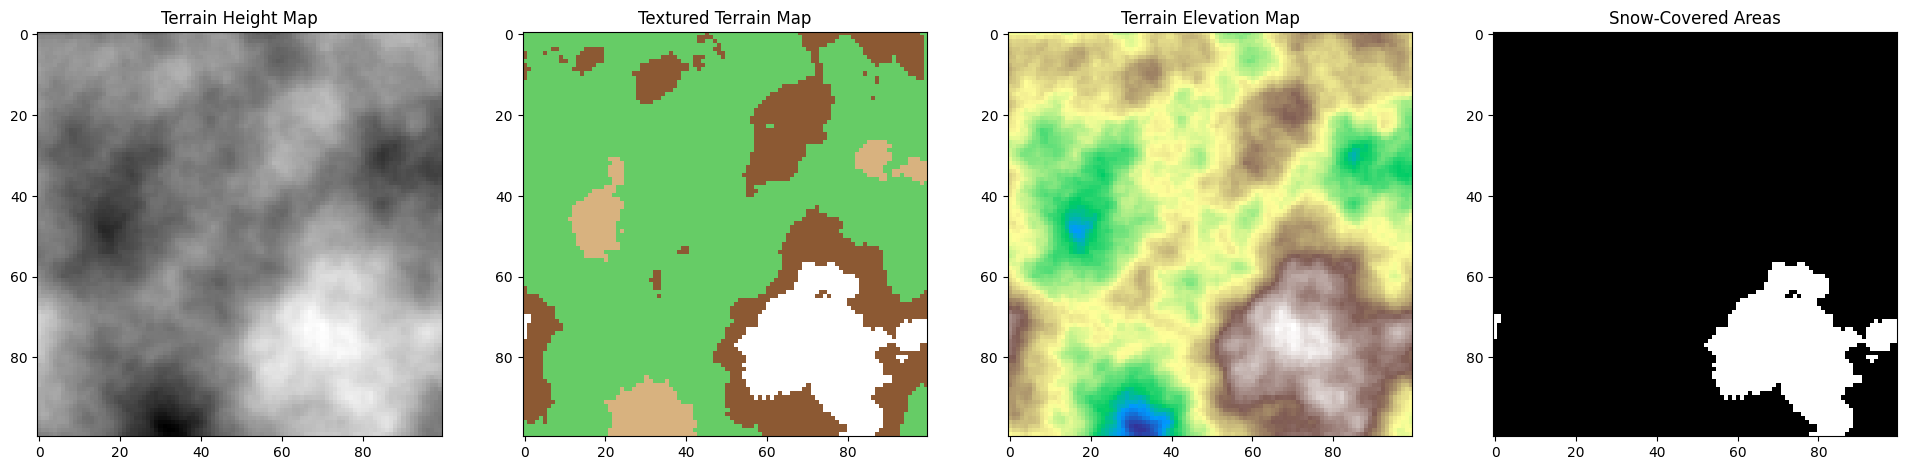

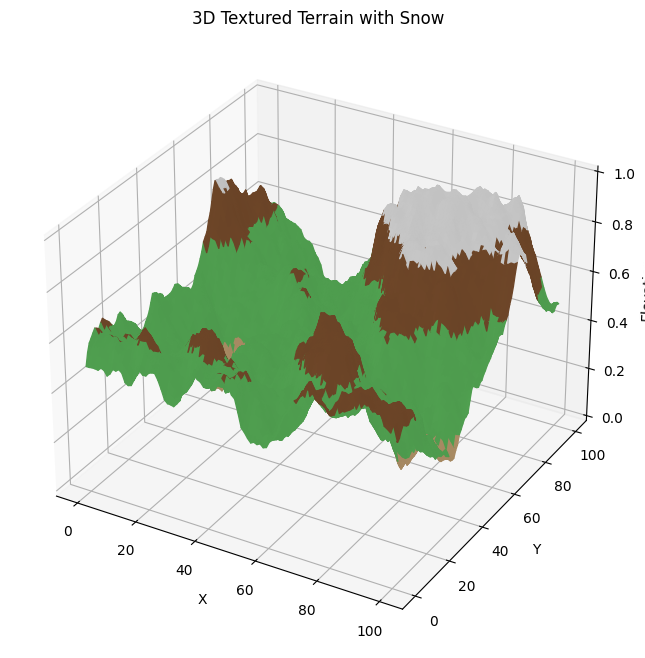

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from noise import pnoise2

# Settings for terrain
terrain_size = 100
scale = 50  # Scale for Perlin noise
octaves = 6
persistence = 0.5
lacunarity = 2.0
snow_threshold = 0.8  # Define threshold for snow peaks

# Generate terrain height map with Perlin noise
terrain = np.zeros((terrain_size, terrain_size))
for i in range(terrain_size):
    for j in range(terrain_size):
        terrain[i][j] = pnoise2(i / scale, j / scale, octaves=octaves, persistence=persistence, lacunarity=lacunarity)

# Normalize terrain
terrain = (terrain - terrain.min()) / (terrain.max() - terrain.min())

# Generate textures with improved Perlin noise
grass_texture = np.zeros((terrain_size, terrain_size))
sand_texture = np.zeros((terrain_size, terrain_size))
soil_texture = np.zeros((terrain_size, terrain_size))
snow_texture = np.zeros((terrain_size, terrain_size))

# Use different scales for each texture to create variation
for i in range(terrain_size):
    for j in range(terrain_size):
        grass_texture[i][j] = pnoise2(i / (scale / 1.5), j / (scale / 1.5), octaves=octaves)
        sand_texture[i][j] = pnoise2(i / (scale / 2), j / (scale / 2), octaves=octaves)
        soil_texture[i][j] = pnoise2(i / (scale / 3), j / (scale / 3), octaves=octaves)
        snow_texture[i][j] = pnoise2(i / (scale / 4), j / (scale / 4), octaves=octaves)

# Normalize textures
textures = [grass_texture, sand_texture, soil_texture, snow_texture]
textures = [(t - t.min()) / (t.max() - t.min()) for t in textures]

# Map textures to terrain based on height levels
textured_terrain = np.zeros((terrain_size, terrain_size, 3))  # RGB for each pixel
for i in range(terrain_size):
    for j in range(terrain_size):
        if terrain[i][j] < 0.3:
            textured_terrain[i][j] = [0.85, 0.7, 0.5]  # Sand color
        elif terrain[i][j] < 0.6:
            textured_terrain[i][j] = [0.4, 0.8, 0.4]  # Grass color
        elif terrain[i][j] < snow_threshold:
            textured_terrain[i][j] = [0.55, 0.35, 0.2]  # Soil color
        else:
            textured_terrain[i][j] = [1.0, 1.0, 1.0]  # Snow color at high peaks

# Plot terrain map and textures
fig, ax = plt.subplots(1, 4, figsize=(24, 6))
ax[0].imshow(terrain, cmap='gray')
ax[0].set_title('Terrain Height Map')
ax[1].imshow(textured_terrain)
ax[1].set_title('Textured Terrain Map')
ax[2].imshow(terrain, cmap='terrain')
ax[2].set_title('Terrain Elevation Map')
ax[3].imshow(terrain > snow_threshold, cmap='gray')
ax[3].set_title('Snow-Covered Areas')
plt.show()

# Display the textured terrain in 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
x = np.linspace(0, terrain_size, terrain_size)
y = np.linspace(0, terrain_size, terrain_size)
x, y = np.meshgrid(x, y)
ax.plot_surface(x, y, terrain, facecolors=textured_terrain, rstride=1, cstride=1, antialiased=True)

ax.set_title('3D Textured Terrain with Snow')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Elevation')
plt.show()
